In [3]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def show(image, colour='bgr'):
    "Display an image with a given colour space"
    if colour == 'bgr':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif colour == 'bgr':
        pass
    elif colour == 'hsv':
        image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    elif colour == 'grey':
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        raise TypeError('Invalid colour type')

    fig = plt.figure()
    plt.imshow(image)
    ax = fig.gca()
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    

# Asterix

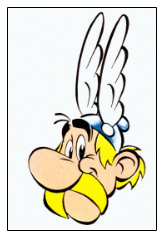

In [23]:
filename = 'asterix.jpg'
img = cv2.imread(filename)
show(img, 'bgr')

In [90]:
# from skimage.transform import downscale_local_mean

# # Print top left pixel
# print 'RGB', img[0][0]

# # Rezize?
# # im = cv2.resize(im, None, fx=0.25, fy=0.25)

# # Now convert to HSV to cluster
# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# print 'HSV', hsv_img[0][0]

# # Downscale x2
# print hsv_img.shape
# hsv_downscaled = downscale_local_mean(hsv_img, (2, 2, 1))
# print hsv_downscaled.shape

# # Reshape for clustering
# hsv_cols = np.reshape(hsv_downscaled,(-1,3))
# hsv_cols = hsv_cols.astype(np.float)

# print hsv_cols.shape

In [88]:
# %%time
# # Cluster using mean shift - takes around 6 seconds
# from sklearn.cluster import MeanShift, estimate_bandwidth

# bandwidth = estimate_bandwidth(hsv_cols, quantile=0.3, n_samples=100)
# print 'bandwidth', bandwidth

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, min_bin_freq=100)
# ms.fit(hsv_cols)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# num_clusters = len(labels_unique)

# print 'num_clusters', num_clusters

# from collections import Counter
# cluster_freq = Counter(labels)
# print cluster_freq

In [89]:
# print 'hsv clusters:\n', cluster_centers
# print cluster_centers.shape
# clustered_img = np.reshape(cluster_centers, (1,-1,3))
# clustered_img = clustered_img.astype(np.uint8)
# clustered_img_rgb = cv2.cvtColor(clustered_img, cv2.COLOR_HSV2RGB)
# plt.imshow(clustered_img_rgb, interpolation='none')

In [26]:
# try clustering using YCrCb colour space

from skimage.transform import downscale_local_mean

# Print top left pixel
print 'RGB', img[0][0]

# Now convert to HSV to cluster
ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
print 'YCrCb', ycrcb_img[0][0]

# Downscale x2
print ycrcb_img.shape
ycrcb_downscaled = downscale_local_mean(ycrcb_img, (2, 2, 1))
print ycrcb_downscaled.shape

# Reshape for clustering
ycrcb_cols = np.reshape(ycrcb_downscaled,(-1,3))
ycrcb_cols = ycrcb_cols.astype(np.float)

print ycrcb_cols.shape

RGB [190 186 197]
YCrCb [190 133 128]
(812, 800, 3)
(406, 400, 3)
(162400, 3)


In [33]:
%%time
# Cluster using mean shift - takes around 6 seconds
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(ycrcb_cols, quantile=0.3, n_samples=200)
print 'bandwidth', bandwidth

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, min_bin_freq=50)
ms.fit(ycrcb_cols)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
num_clusters = len(labels_unique)

print 'num_clusters', num_clusters

from collections import Counter
cluster_freq = Counter(labels)
print cluster_freq

bandwidth 42.0889099433
num_clusters 4
Counter({0: 132331, 1: 24212, 2: 4380, 3: 1477})
CPU times: user 7.78 s, sys: 47.6 ms, total: 7.83 s
Wall time: 7.94 s


ycrcb clusters:
[[ 239.3249182   130.65601867  127.97193516]
 [  12.19159366  137.24644231  125.62775228]
 [ 200.4539382   159.19487686   30.69046236]
 [  79.18456848  221.41697936   86.92307692]]
(4, 3)


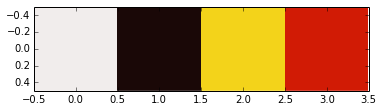

In [308]:
print 'ycrcb clusters:\n', cluster_centers
print cluster_centers.shape
clustered_img = np.reshape(cluster_centers, (1,-1,3))
clustered_img = clustered_img.astype(np.uint8)
clustered_img_rgb = cv2.cvtColor(clustered_img, cv2.COLOR_YCR_CB2RGB)
plt.imshow(clustered_img_rgb, interpolation='none')

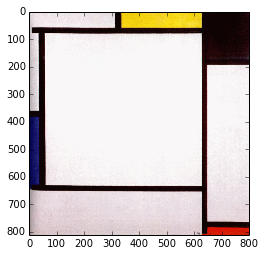

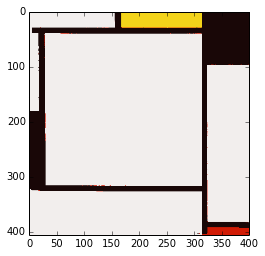

In [72]:
# segment image
segmented = cluster_centers[labels]
segmented_img_ycr = np.reshape(segmented, ycrcb_downscaled.shape)
segmented_img_ycr = segmented_img_ycr.astype(np.uint8)
segmented_img = cv2.cvtColor(segmented_img_ycr, cv2.COLOR_YCR_CB2RGB)
show_bgr(img)
show_rgb(segmented_img)

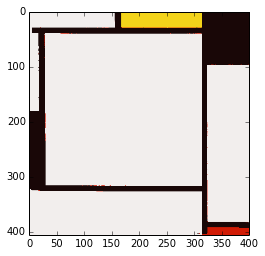

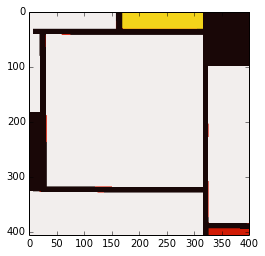

In [111]:
# Remove smaller than 2x2 dots
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
segmented_img_closed = cv2.morphologyEx(segmented_img, cv2.MORPH_CLOSE, kernel)

# Tidy up fuzzy bits by opening with a square kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(12,12))
segmented_img_opened = cv2.morphologyEx(segmented_img_closed, cv2.MORPH_OPEN, kernel)

# Remove thin contours ?
segmented_img_clean = segmented_img_opened

show_rgb(segmented_img)
show_rgb(segmented_img_clean)

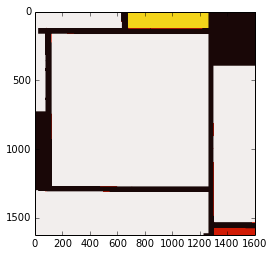

In [84]:
# We could now upscale the image for printing etc
seg_img_large = cv2.resize(segmented_img_clean, None, fx=4, fy=4)
show_rgb(seg_img_large)

(406, 400, 3)
[[ 25   7   5]
 [ 25   7   7]
 [209  27   5]
 [209  27   7]
 [242 238 237]
 [243 212  26]]
black [25  7  7]


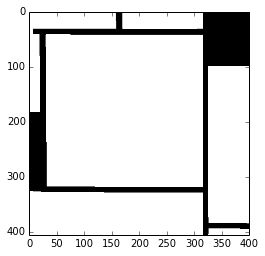

In [216]:
# Next - extract just black regions
shape = segmented_img_closed.shape
print shape

# List of colours
list_colours = np.reshape(segmented_img_clean, (-1,3))
# List of tuples
list_tuples = [tuple(row) for row in list_colours]
# Unique
unique_colours = np.unique(list_tuples)
print unique_colours

def find_most_black(colours):
    """ return first blackish colour """
    return min(colours, lambda c: sum(c))

# Extract most black
black = find_black(unique_colours)

# TODO fixme
black = np.array([25, 7, 7])
print 'black', black

list_bool_black = (list_colours == black).all(axis=1)
img_is_black = list_bool_black.reshape(shape[0], -1)
img_binary = img_is_black.astype(np.uint8)
img_binary[img_binary == 0] = 255 # 0 -> 255
img_binary[img_binary == 1] = 0   # 1 -> 0

# 0-255 to RGB
show_grey(img_binary)
# show_rgb(img_black)

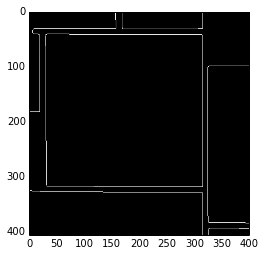

In [287]:
img_edges = cv2.Canny(img_binary, 10, 50, apertureSize=5)
show_grey(img_edges)

# Determine line widths
# Scale to 1px wide lines?

In [274]:
import math

# Polar to rectangular line coordinates
def polar_to_rect(rho, theta):
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    d = 1000
    pt1 = (
        int(x0 + d * -b),
        int(y0 + d * a)
    )
    pt2 = (
        int(x0 - d * -b),
        int(y0 - d * a)
    )
    return pt1, pt2

print polar_to_rect(0, 0)

((0, 1000), (0, -1000))


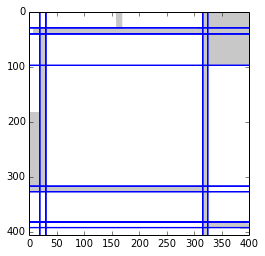

In [294]:
# Hough transform to find straight lines
tolerance = 50
lines = cv2.HoughLines(img_edges, 1, math.pi / 2, tolerance)

# Image to overlay lines
img_lines = cv2.cvtColor(img_binary, cv2.COLOR_GRAY2RGB)
# Fade black to light grey
img_lines[img_binary == 0] = (200, 200, 200)

blue = (0, 0, 255)

for rho, theta in lines[0]:
    deg = theta * 180 / math.pi
    
    if deg == 0:
        pass
#         print 'vertical'
    elif 89 < deg < 91:
        deg = 90
        theta = deg * math.pi / 180
#         print 'horizontal'
    else:
        continue
    pt1, pt2 = polar_to_rect(rho, theta)
    cv2.line(img_lines, pt1, pt2, blue, 2)

show_rgb(img_lines)

314 318 314 43
73 42 312 42
323 371 323 102
117 318 313 318
9 31 157 31
134 328 312 328
169 32 305 32
30 234 30 63
19 182 19 79
20 327 133 327
31 315 31 235
32 317 116 317
325 383 391 383
326 99 399 99
327 393 379 393
33 41 72 41


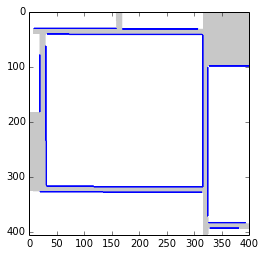

In [306]:
# probabilistic Hough transform
tolerance = 50
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 2, tolerance, minLineLength=10)

# Image to overlay lines
img_lines = cv2.cvtColor(img_binary, cv2.COLOR_GRAY2RGB)
# Fade black to light grey
img_lines[img_binary == 0] = (200, 200, 200)

blue = (0, 0, 255)

for x1, y1, x2, y2 in lines[0]:
    print x1, y1, x2, y2
    cv2.line(img_lines, (x1, y1), (x2, y2), blue, 2)

show_rgb(img_lines)